In this notebook, we will build two linear regression models using Tensorflow.  
1. Use all the features to predict Price_Index
2. Use a subset of features to predict Price_Index  

https://www.tensorflow.org/tutorials/keras/regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

# #https://stackoverflow.com/questions/69136518/tensorflow-2-getting-warningtensorflowx-out-of-the-last-x-calls-to-function
# tf.compat.v1.disable_eager_execution()

print(tf.__version__)

2.6.2


In [2]:
df = pd.read_csv('price_indicies.csv')

In [3]:
cols_to_keep = ['City'
    , 'Price_Index'
    , 'Monthly rent for 85 m2 (900 sqft) furnished accommodation in expensive area']
df.loc[:, cols_to_keep].sort_values(by = 'Monthly rent for 85 m2 (900 sqft) furnished accommodation in expensive area', ascending = False)

,City,Price_Index,Monthly rent for 85 m2 (900 sqft) furnished accommodation in expensive area
2,"San Francisco, California, United States",239,6144.0
6,Hong Kong,233,5869.0
3,"New York City, United States",238,4503.0
1,"Grand Cayman, Cayman Islands",253,4435.0
5,"Geneva, Switzerland",237,3771.0
...,...,...,...
156,"Bucaramanga, Colombia",55,422.0
155,"Arequipa, Peru",56,418.0
158,"Istanbul, Turkey",45,396.0
159,"Ankara, Turkey",40,275.0


In [4]:
cols_to_keep = ['City'
    , 'Price_Index'
    , 'Monthly rent for 85 m2 (900 sqft) furnished accommodation in expensive area']
df.loc[:, cols_to_keep].sort_values(by = 'Price_Index', ascending = False)

,City,Price_Index,Monthly rent for 85 m2 (900 sqft) furnished accommodation in expensive area
0,"Zurich, Switzerland",255,3743.0
1,"Grand Cayman, Cayman Islands",253,4435.0
2,"San Francisco, California, United States",239,6144.0
3,"New York City, United States",238,4503.0
4,"London, United Kingdom",238,3131.0
...,...,...,...
156,"Bucaramanga, Colombia",55,422.0
157,"Pune, India",52,475.0
158,"Istanbul, Turkey",45,396.0
159,"Ankara, Turkey",40,275.0


In [5]:
df.shape

(161, 54)

In [6]:
df.head()

,City,Price_Index,Basic lunchtime menu (including a drink) in the business district,Combo meal in fast food restaurant (big mac meal or similar),500 gr (1 lb.) of boneless chicken breast,1 liter (1 qt.) of whole fat milk,"12 eggs, large",1 kg (2 lb.) of tomatoes,500 gr (16 oz.) of local cheese,1 kg (2 lb.) of apples,...,2 tickets to the movies,2 tickets to the theater (best available seats),"Dinner for two at an italian restaurant in the expat area including appetisers, main course, wine and dessert",1 cocktail drink in downtown club,Cappuccino in expat area of the city,1 beer in neighbourhood pub (500ml or 1pt.),Ipad wi-fi 128gb,1 min. of prepaid mobile tariff (no discounts or plans),1 month of gym membership in business district,1 package of marlboro cigarettes
0,"Zurich, Switzerland",255,29.0,15.0,12.00,1.98,8.00,3.88,10.0,3.80,...,36.0,283,105,18.0,5.63,8.0,536,0.44,131,9.0
1,"Grand Cayman, Cayman Islands",253,19.0,10.0,6.00,3.21,5.63,8.00,8.0,7.00,...,33.0,56,106,13.0,6.00,7.0,635,0.41,79,12.0
2,"San Francisco, California, United States",239,20.0,10.0,7.00,1.23,4.46,7.00,7.0,6.00,...,30.0,263,94,14.0,4.79,7.0,426,0.14,83,12.0
3,"New York City, United States",238,19.0,9.0,6.00,1.11,3.63,4.62,7.0,3.73,...,31.0,397,113,17.0,5.12,7.0,423,0.48,74,14.0
4,"London, United Kingdom",238,17.0,8.0,5.18,1.31,3.76,2.69,7.0,3.07,...,33.0,293,101,15.0,4.53,8.0,683,0.47,66,17.0


# Check for nulls

In [7]:
df.isna().sum()

City                                                                                                             0
Price_Index                                                                                                      0
Basic lunchtime menu (including a drink) in the business district                                                0
Combo meal in fast food restaurant (big mac meal or similar)                                                     0
500 gr (1 lb.) of boneless chicken breast                                                                        0
1 liter (1 qt.) of whole fat milk                                                                                0
12 eggs, large                                                                                                   0
1 kg (2 lb.) of tomatoes                                                                                         0
500 gr (16 oz.) of local cheese                                                 

In [8]:
# drop nulls for now
df = df.dropna()
df.shape

(160, 54)

# Split the dataset

In [9]:
train_df = df.sample(frac = 0.8, random_state = 0)
test_df = df.drop(train_df.index)

In [10]:
assert len(train_df) + len(test_df) == len(df)

In [11]:
train_features = train_df.drop(columns = ['City']).copy()
test_features = test_df.drop(columns = ['City']).copy()

train_labels = train_features.pop('Price_Index')
test_labels = test_features.pop('Price_Index')

train_labels = train_labels.astype('float32')
test_labels = test_labels.astype('float32')

# Inspect the data

In [12]:
train_features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Basic lunchtime menu (including a drink) in the business district,128.0,12.748047,5.703008,2.51,8.0000,13.000,17.0000,31.00
Combo meal in fast food restaurant (big mac meal or similar),128.0,7.778594,2.786424,2.16,5.7475,8.000,9.0000,18.00
500 gr (1 lb.) of boneless chicken breast,128.0,4.037031,2.059597,1.22,2.4675,3.925,5.0325,14.00
1 liter (1 qt.) of whole fat milk,128.0,1.183359,0.486633,0.48,0.8475,1.080,1.3425,3.28
"12 eggs, large",128.0,3.013203,1.401884,1.09,1.9575,2.775,3.6550,9.00
1 kg (2 lb.) of tomatoes,128.0,2.564609,1.563275,0.39,1.3225,2.225,3.7475,8.00
500 gr (16 oz.) of local cheese,128.0,5.665703,2.276952,1.78,3.9850,5.730,7.0000,13.00
1 kg (2 lb.) of apples,128.0,2.573047,1.176224,0.40,1.6875,2.465,3.2950,7.00
1 kg (2 lb.) of potatoes,128.0,1.451250,0.704642,0.25,0.9400,1.385,1.7900,3.67
0.5 l (16 oz) domestic beer in the supermarket,128.0,2.082266,1.108763,0.70,1.1350,1.725,2.8125,5.11


# Normalize the features

In [13]:
normalizer = tf.keras.layers.Normalization(axis = -1)
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

2022-02-22 08:54:33.019430: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


[[1.27480469e+01 7.77859354e+00 4.03703117e+00 1.18335938e+00
  3.01320314e+00 2.56460929e+00 5.66570282e+00 2.57304668e+00
  1.45125008e+00 2.08226585e+00 1.18986721e+01 2.00468731e+00
  1.41039062e+00 1.69317969e+03 1.19565625e+03 1.38585938e+02
  1.10686719e+03 7.78375000e+02 9.28046875e+01 3.38380470e+01
  3.81140625e+02 1.23648430e+02 8.34687424e+00 1.41267185e+01
  6.66093750e+01 4.06875000e+01 8.86953125e+01 1.02632805e+02
  2.48652500e+04 1.19359374e+00 6.01484337e+01 1.59824209e+01
  6.16773462e+00 1.20292969e+01 6.38359337e+01 5.14710903e+00
  3.49757791e+00 4.26398420e+00 2.35343742e+00 2.09062481e+00
  1.86407814e+01 3.57649231e+01 1.91589832e+01 9.91796875e+01
  6.23203087e+01 1.03532028e+01 3.69453120e+00 4.68929672e+00
  5.22664062e+02 2.11015612e-01 4.99296875e+01 7.22296858e+00]]


In [14]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print()
    print('Normalized:', normalizer(first).numpy())

First example: [[   11.       6.       3.4      1.59     2.21     1.55     4.97     2.39
      2.03     1.65    14.       2.1      1.08  1007.     568.      75.
    660.     358.      63.      29.     411.      94.      12.       5.2
     68.      46.     111.      94.   16707.       1.05    17.      10.
      5.09    11.      37.       7.       4.01     6.       2.58     2.1
     12.      26.      11.      27.      55.       7.       3.64     3.44
    811.       0.13    57.       3.55]]

Normalized: [[-0.31 -0.64 -0.31  0.84 -0.58 -0.65 -0.31 -0.16  0.82 -0.39  0.43  0.14
  -0.41 -0.64 -0.78 -0.99 -0.63 -0.81 -0.66 -0.27  0.3  -0.86  1.09 -0.92
   0.05  0.55  1.03 -0.22 -0.89 -0.33 -1.21 -0.67 -0.4  -0.15 -0.64  1.06
   0.47  1.32  0.19  0.01 -0.65 -0.57 -0.93 -0.94 -0.26 -0.83 -0.04 -0.51
   2.86 -0.56  0.34 -0.69]]


In [15]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units = 1)
])

linear_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 52)                105       
_________________________________________________________________
dense (Dense)                (None, 1)                 53        
Total params: 158
Trainable params: 53
Non-trainable params: 105
_________________________________________________________________


# Linear regression with one variable  
- Build a model with one variable --> rent

In [16]:
rent_col_name = 'Monthly rent for 85 m2 (900 sqft) furnished accommodation in expensive area'
rent = np.array(train_features[rent_col_name])

rent_normalizer = layers.Normalization(input_shape=[1,], axis = None)
rent_normalizer.adapt(rent)

# Build the Keras Sequential model

In [17]:
rent_model = tf.keras.Sequential([
    rent_normalizer,
    layers.Dense(units=1)
])

rent_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [18]:
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 
    
rent_model.compile(
    optimizer = tf.optimizers.Adam(learning_rate = 0.1),
    loss = root_mean_squared_error)

In [19]:
%%time
history = rent_model.fit(
    train_features[rent_col_name],
    train_labels,
    epochs = 400,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 10.6 s, sys: 1.03 s, total: 11.6 s
Wall time: 9.93 s


In [20]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error [Price Index]')
    plt.legend()
    plt.grid(True)

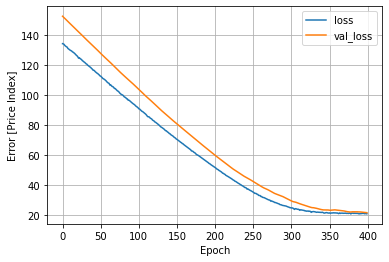

In [21]:
plot_loss(history)

# Save results in a dictionary

In [22]:
test_results = {}

test_results['rent_model'] = rent_model.evaluate(
    test_features[rent_col_name],
    test_labels, verbose = 0)

# View the models prediction as a function of the input

In [23]:
min_rent = df[rent_col_name].min()
max_rent = df[rent_col_name].max()
num_steps = max_rent - min_rent + 1

x = tf.linspace(min_rent, max_rent, num_steps)
y = rent_model.predict(x)

In [24]:
def plot_rent(x, y):
    plt.scatter(train_features[rent_col_name], train_labels, label = 'Data')
    plt.plot(x, y, color = 'k', label = 'Predictions')
    plt.xlabel('Rent')
    plt.ylabel('Price Index')
    plt.legend()

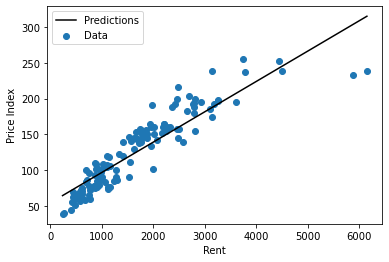

In [25]:
plot_rent(x, y)

# Linear regression with multiple inputs

In [26]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

linear_model.compile(
    optimizer = tf.optimizers.Adam(learning_rate = 0.1),
    loss = root_mean_squared_error)

linear_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 52)                105       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 53        
Total params: 158
Trainable params: 53
Non-trainable params: 105
_________________________________________________________________


In [27]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs = 800,
    # Suppress logging.
    verbose = 0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 20.7 s, sys: 2.07 s, total: 22.7 s
Wall time: 19 s


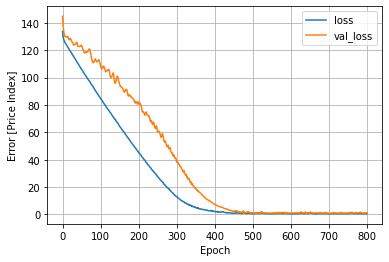

In [28]:
plot_loss(history)

# Save results in a dataframe

In [29]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose = 0)

# Deep Neural Networks (DNN) for regression

In [30]:
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
    ])

    model.compile(loss = root_mean_squared_error,
                optimizer = tf.keras.optimizers.Adam(0.001))
    return model

# Regression using DNN and a single input

In [31]:
rent_col_name = 'Monthly rent for 85 m2 (900 sqft) furnished accommodation in expensive area'
rent = np.array(train_features[rent_col_name])

rent_normalizer = layers.Normalization(input_shape = [1,], axis = None)
rent_normalizer.adapt(rent)

In [32]:
dnn_rent_model = build_and_compile_model(rent_normalizer)
dnn_rent_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_2 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 8,516
Trainable params: 8,513
Non-trainable params: 3
_________________________________________________________________


In [33]:
%%time
dnn_rent_model = build_and_compile_model(rent_normalizer)
history = dnn_rent_model.fit(
    train_features[rent_col_name],
    train_labels,
    validation_split = 0.2,
    verbose = 0, epochs = 200)

CPU times: user 6.48 s, sys: 808 ms, total: 7.29 s
Wall time: 5.68 s


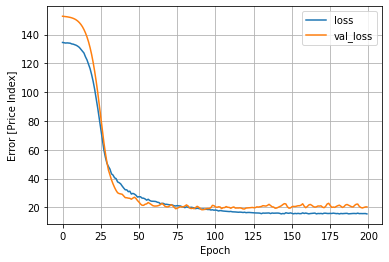

In [34]:
plot_loss(history)

# View the models prediction as a function of the input

In [35]:
min_rent = df[rent_col_name].min()
max_rent = df[rent_col_name].max()
num_steps = max_rent - min_rent + 1

x = tf.linspace(min_rent, max_rent, num_steps)
y = dnn_rent_model.predict(x)

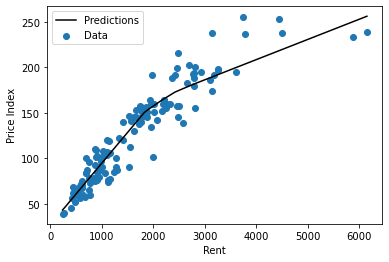

In [36]:
plot_rent(x, y)

In [37]:
test_results['dnn_rent_model'] = dnn_rent_model.evaluate(
    test_features[rent_col_name], test_labels,
    verbose = 0)

# Regression using a DNN and three inputs
- fast food 
- rent  
- transit ticket  

In [38]:
fast_food_col_name = 'Combo meal in fast food restaurant (big mac meal or similar)'
rent_col_name = 'Monthly rent for 85 m2 (900 sqft) furnished accommodation in expensive area'
transit_col_name = 'Monthly ticket public transport'

three_features = [fast_food_col_name, rent_col_name, transit_col_name]

In [39]:
features_lst = list(train_features.columns)
fast_food_idx = features_lst.index(fast_food_col_name)
rent_idx = features_lst.index(rent_col_name)
transit_idx = features_lst.index(transit_col_name)

In [40]:
train_three_features = train_df[three_features].copy()
test_three_features = test_df[three_features].copy()

normalizer_three_features = tf.keras.layers.Normalization(axis = -1)
normalizer_three_features.adapt(np.array(train_three_features))
print(normalizer_three_features.mean.numpy())

[[   7.7785935 1693.1797      60.148434 ]]


In [41]:
dnn_three_feature_model = build_and_compile_model(normalizer_three_features)
dnn_three_feature_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_3 (Normalizati (None, 3)                 7         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                256       
_________________________________________________________________
dense_12 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 8,648
Trainable params: 8,641
Non-trainable params: 7
_________________________________________________________________


In [42]:
%%time
history = dnn_three_feature_model.fit(
    train_features[three_features],
    train_labels,
    validation_split = 0.2,
    verbose = 0, epochs = 400)

CPU times: user 13.2 s, sys: 1.63 s, total: 14.8 s
Wall time: 11.6 s


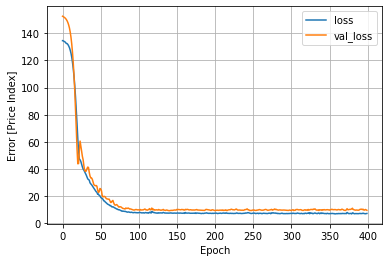

In [43]:
plot_loss(history)

In [44]:
test_results['dnn_three_features_model'] = (
    dnn_three_feature_model.evaluate(test_three_features, test_labels, verbose = 0))

# Regression using a DNN and all inputs

In [45]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 52)                105       
_________________________________________________________________
dense_15 (Dense)             (None, 64)                3392      
_________________________________________________________________
dense_16 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_17 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 65        
Total params: 11,882
Trainable params: 11,777
Non-trainable params: 105
_________________________________________________________________


In [46]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split = 0.2,
    verbose = 0, epochs = 400)

CPU times: user 12.9 s, sys: 1.72 s, total: 14.6 s
Wall time: 11.2 s


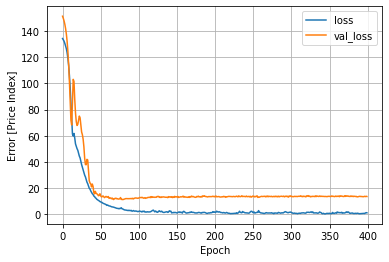

In [47]:
plot_loss(history)

In [48]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose = 0)

In [49]:
results_df = pd.DataFrame(test_results, index  =['Root Mean Squared Error (Price Index)']).T
results_df

,Root Mean Squared Error (Price Index)
rent_model,17.394199
linear_model,0.751028
dnn_rent_model,15.944875
dnn_three_features_model,10.174789
dnn_model,18.397362


# Make Predictions

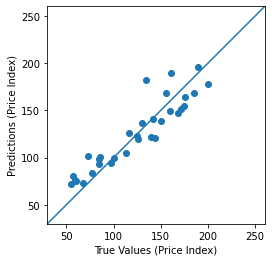

In [50]:
# linear rent model
test_predictions = rent_model.predict(test_features[rent_col_name]).flatten()

a = plt.axes(aspect = 'equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values (Price Index)')
plt.ylabel('Predictions (Price Index)')
lims = [30, 260]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

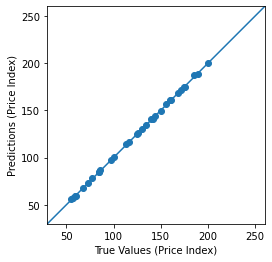

In [51]:
# linear model all features
test_predictions = linear_model.predict(test_features).flatten()

a = plt.axes(aspect = 'equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values (Price Index)')
plt.ylabel('Predictions (Price Index)')
lims = [30, 260]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

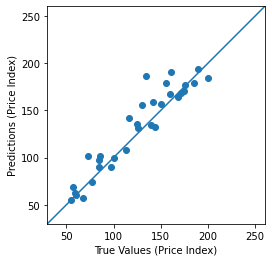

In [52]:
# dnn rent model
test_predictions = dnn_rent_model.predict(test_features[rent_col_name]).flatten()

a = plt.axes(aspect = 'equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values (Price Index)')
plt.ylabel('Predictions (Price Index)')
lims = [30, 260]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

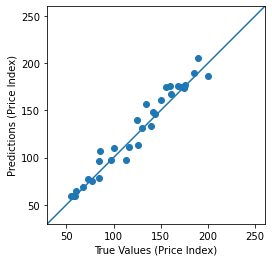

In [53]:
# dnn three features
test_predictions = dnn_three_feature_model.predict(test_features[three_features]).flatten()

a = plt.axes(aspect = 'equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values (Price Index)')
plt.ylabel('Predictions (Price Index)')
lims = [30, 260]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

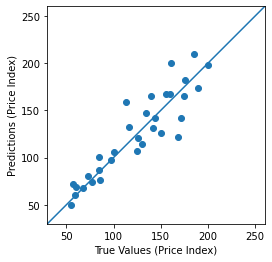

In [54]:
# dnn model all features
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect = 'equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values (Price Index)')
plt.ylabel('Predictions (Price Index)')
lims = [30, 260]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [55]:
dnn_three_feature_model.save('dnn_three_feature_model')

2022-02-22 08:55:37.707636: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: dnn_three_feature_model/assets


In [56]:
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

reloaded = tf.keras.models.load_model('dnn_three_feature_model'
    , custom_objects = {'root_mean_squared_error': root_mean_squared_error})

test_results['reloaded'] = reloaded.evaluate(
    test_features[three_features], test_labels, verbose = 0)

In [57]:
results_df = pd.DataFrame(test_results, index=['Root Mean Squared Error (Price Index)']).T
results_df

,Root Mean Squared Error (Price Index)
rent_model,17.394199
linear_model,0.751028
dnn_rent_model,15.944875
dnn_three_features_model,10.174789
dnn_model,18.397362
reloaded,10.174789


In [58]:
test_features[three_features]

,Combo meal in fast food restaurant (big mac meal or similar),Monthly rent for 85 m2 (900 sqft) furnished accommodation in expensive area,Monthly ticket public transport
9,9.00,2904.0,91
21,12.00,3337.0,87
25,11.00,2689.0,97
28,8.00,2582.0,96
29,8.00,2356.0,105
31,9.00,2281.0,104
32,9.00,2183.0,111
36,7.00,3175.0,40
39,9.00,2250.0,108
47,9.00,2693.0,70


In [59]:
fast_food_col_name = 'Combo meal in fast food restaurant (big mac meal or similar)'
rent_col_name = 'Monthly rent for 85 m2 (900 sqft) furnished accommodation in expensive area'
transit_col_name = 'Monthly ticket public transport'

three_features = [fast_food_col_name, rent_col_name, transit_col_name]

south_bend = pd.DataFrame({
    fast_food_col_name: [7.49]
    , rent_col_name: [2000]
    , transit_col_name: [35]
})

In [60]:
south_bend

,Combo meal in fast food restaurant (big mac meal or similar),Monthly rent for 85 m2 (900 sqft) furnished accommodation in expensive area,Monthly ticket public transport
0,7.49,2000,35


In [61]:
reloaded.predict(south_bend)

array([[129.42809]], dtype=float32)

In [62]:
filt1 = df['City'] == 'Chicago, Illinois, United States'
df[filt1]

,City,Price_Index,Basic lunchtime menu (including a drink) in the business district,Combo meal in fast food restaurant (big mac meal or similar),500 gr (1 lb.) of boneless chicken breast,1 liter (1 qt.) of whole fat milk,"12 eggs, large",1 kg (2 lb.) of tomatoes,500 gr (16 oz.) of local cheese,1 kg (2 lb.) of apples,...,2 tickets to the movies,2 tickets to the theater (best available seats),"Dinner for two at an italian restaurant in the expat area including appetisers, main course, wine and dessert",1 cocktail drink in downtown club,Cappuccino in expat area of the city,1 beer in neighbourhood pub (500ml or 1pt.),Ipad wi-fi 128gb,1 min. of prepaid mobile tariff (no discounts or plans),1 month of gym membership in business district,1 package of marlboro cigarettes
26,"Chicago, Illinois, United States",183,18.0,9.0,4.76,1.02,3.57,4.09,7.0,3.57,...,26.0,253,101,15.0,4.91,6.0,501,0.52,76,14.0


# Comparing Chicago to South Bend

In [63]:
chicago = pd.DataFrame({
    fast_food_col_name: [8.69]
    , rent_col_name: [3000]
    , transit_col_name: [75]
})

In [64]:
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

reloaded = tf.keras.models.load_model('dnn_three_feature_model'
    , custom_objects = {'root_mean_squared_error': root_mean_squared_error})

reloaded.predict(chicago)

array([[182.97177]], dtype=float32)